<a href="https://colab.research.google.com/github/mjgpinheiro/Econophysics/blob/main/Progress_Barometer2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


EU Comparison Data:
   Country_Name  Unemployment_Rate  Unemployment_vs_PRT_%  GDP_Per_Capita  \
2       Germany                3.0             -50.819672           47700   
7   Netherlands                3.5             -42.622951           54800   
6       Ireland                4.8             -21.311475           94400   
9       Austria                4.8             -21.311475           51900   
12      Denmark                4.8             -21.311475           61400   
8       Belgium                5.7              -6.557377           48300   
0      Portugal                6.1               0.000000           23900   
10      Finland                6.8              11.475410           49300   
11       Sweden                7.4              21.311475           54100   
3        France                7.4              21.311475           40500   
4         Italy                8.1              32.786885           35500   
5        Greece               12.6             106.5573

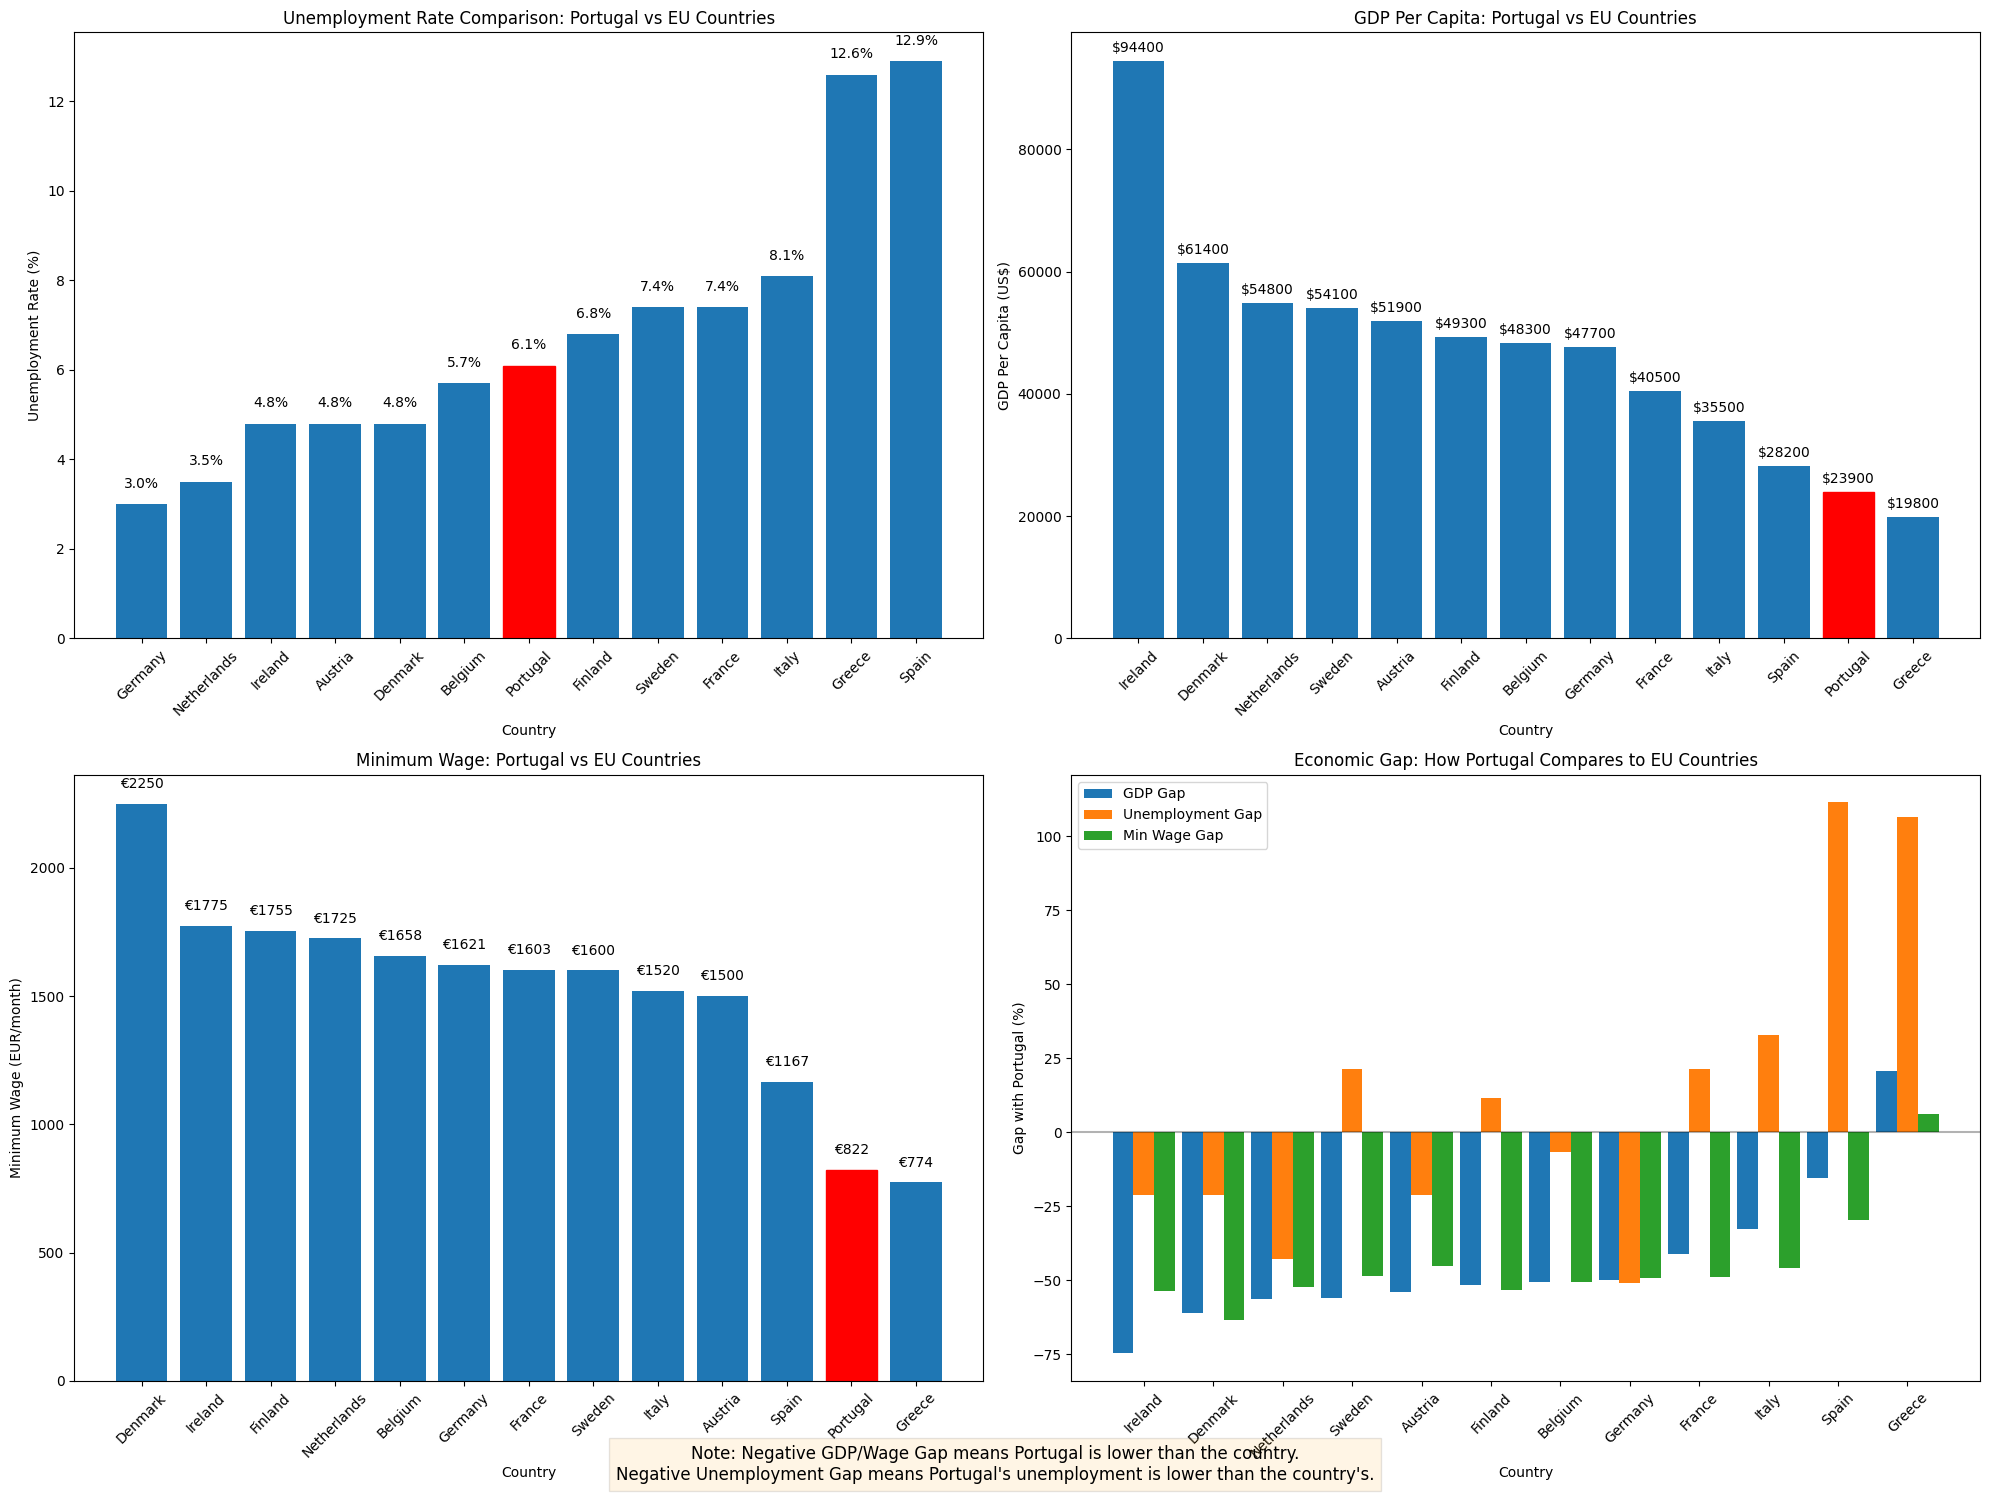

<Figure size 1200x800 with 0 Axes>

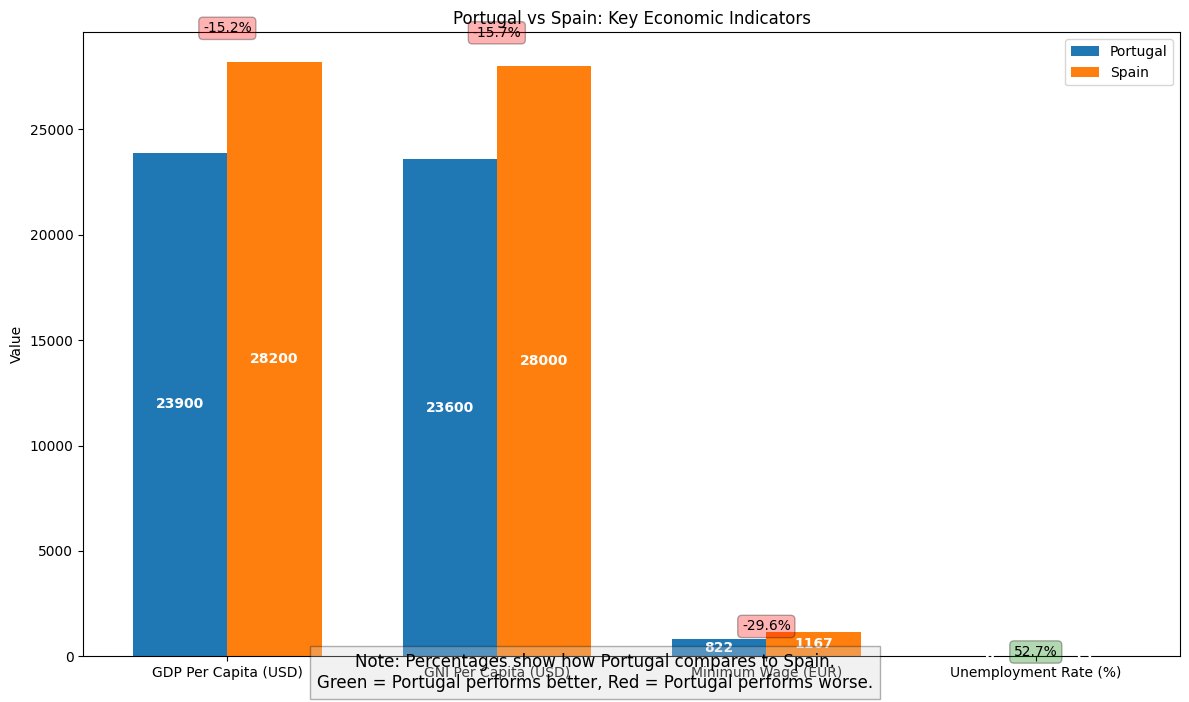


Comparison data saved to 'portugal_eu_economic_comparison.csv'
Visualizations saved to PNG files

PORTUGAL vs SPAIN SUMMARY:
GDP Per Capita: Portugal €23900 vs Spain €28200 (-15.2%)
Minimum Wage: Portugal €822 vs Spain €1167 (-29.6%)
Unemployment Rate: Portugal 6.1% vs Spain 12.9% (-52.7%)


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Define EU countries
eu_countries = ["PRT", "ESP", "DEU", "FRA", "ITA", "GRC", "IRL", "NLD", "BEL", "AUT", "FIN", "SWE", "DNK"]
country_names = {
    "PRT": "Portugal", "ESP": "Spain", "DEU": "Germany",
    "FRA": "France", "ITA": "Italy", "GRC": "Greece",
    "IRL": "Ireland", "NLD": "Netherlands", "BEL": "Belgium",
    "AUT": "Austria", "FIN": "Finland", "SWE": "Sweden", "DNK": "Denmark"
}

# Create static data for EU countries (2022 data, approximate values)
data = {
    "Country": eu_countries,
    "Country_Name": [country_names[code] for code in eu_countries],
    "Unemployment_Rate": [6.1, 12.9, 3.0, 7.4, 8.1, 12.6, 4.8, 3.5, 5.7, 4.8, 6.8, 7.4, 4.8],  # Percentage
    "GDP_Per_Capita": [23900, 28200, 47700, 40500, 35500, 19800, 94400, 54800, 48300, 51900, 49300, 54100, 61400],  # USD
    "GNI_Per_Capita": [23600, 28000, 47100, 40300, 35100, 19500, 92300, 54200, 47800, 51200, 48800, 53600, 60800],  # USD
    "Minimum_Wage": [822, 1167, 1621, 1603, 1520, 774, 1775, 1725, 1658, 1500, 1755, 1600, 2250]  # EUR per month
}

# Create DataFrame
eu_data = pd.DataFrame(data)

# Find Portugal's data
portugal_data = eu_data[eu_data["Country"] == "PRT"]

# Calculate percentage differences with Portugal
eu_data["Unemployment_vs_PRT_%"] = ((eu_data["Unemployment_Rate"] - portugal_data["Unemployment_Rate"].values[0]) /
                                  portugal_data["Unemployment_Rate"].values[0] * 100)

eu_data["GDP_vs_PRT_%"] = ((portugal_data["GDP_Per_Capita"].values[0] - eu_data["GDP_Per_Capita"]) /
                          eu_data["GDP_Per_Capita"] * 100)

eu_data["GNI_vs_PRT_%"] = ((portugal_data["GNI_Per_Capita"].values[0] - eu_data["GNI_Per_Capita"]) /
                          eu_data["GNI_Per_Capita"] * 100)

eu_data["Min_Wage_vs_PRT_%"] = ((portugal_data["Minimum_Wage"].values[0] - eu_data["Minimum_Wage"]) /
                               eu_data["Minimum_Wage"] * 100)

# Display the comparison data
print("\nEU Comparison Data:")
comparison_display = eu_data[["Country_Name",
                             "Unemployment_Rate", "Unemployment_vs_PRT_%",
                             "GDP_Per_Capita", "GDP_vs_PRT_%",
                             "GNI_Per_Capita", "GNI_vs_PRT_%",
                             "Minimum_Wage", "Min_Wage_vs_PRT_%"]]

print(comparison_display.sort_values("Unemployment_Rate"))

# Create visualizations
plt.figure(figsize=(20, 15))

# 1. Unemployment Rate Comparison
plt.subplot(2, 2, 1)
unemployment_sorted = eu_data.sort_values("Unemployment_Rate")
bars = plt.bar(unemployment_sorted["Country_Name"], unemployment_sorted["Unemployment_Rate"])

# Highlight Portugal
portugal_idx = unemployment_sorted[unemployment_sorted["Country"] == "PRT"].index[0]
portugal_pos = list(unemployment_sorted.index).index(portugal_idx)
bars[portugal_pos].set_color("red")

plt.xlabel("Country")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate Comparison: Portugal vs EU Countries")
plt.xticks(rotation=45)

# Add value labels to bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f"{height:.1f}%", ha='center', va='bottom', rotation=0)

# 2. GDP Per Capita Comparison
plt.subplot(2, 2, 2)
gdp_sorted = eu_data.sort_values("GDP_Per_Capita", ascending=False)
bars = plt.bar(gdp_sorted["Country_Name"], gdp_sorted["GDP_Per_Capita"])

# Highlight Portugal
portugal_idx = gdp_sorted[gdp_sorted["Country"] == "PRT"].index[0]
portugal_pos = list(gdp_sorted.index).index(portugal_idx)
bars[portugal_pos].set_color("red")

plt.xlabel("Country")
plt.ylabel("GDP Per Capita (US$)")
plt.title("GDP Per Capita: Portugal vs EU Countries")
plt.xticks(rotation=45)

# Add value labels to bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1000,
            f"${height:.0f}", ha='center', va='bottom', rotation=0)

# 3. Minimum Wage Comparison
plt.subplot(2, 2, 3)
wage_sorted = eu_data.sort_values("Minimum_Wage", ascending=False)
bars = plt.bar(wage_sorted["Country_Name"], wage_sorted["Minimum_Wage"])

# Highlight Portugal
portugal_idx = wage_sorted[wage_sorted["Country"] == "PRT"].index[0]
portugal_pos = list(wage_sorted.index).index(portugal_idx)
bars[portugal_pos].set_color("red")

plt.xlabel("Country")
plt.ylabel("Minimum Wage (EUR/month)")
plt.title("Minimum Wage: Portugal vs EU Countries")
plt.xticks(rotation=45)

# Add value labels to bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
            f"€{height:.0f}", ha='center', va='bottom', rotation=0)

# 4. Economic Gap with Portugal
plt.subplot(2, 2, 4)

# Sort countries by GDP gap with Portugal (excluding Portugal itself)
gap_data = eu_data[eu_data["Country"] != "PRT"].sort_values("GDP_vs_PRT_%")

# Create index for positioning bars
x = np.arange(len(gap_data))
width = 0.3

# Create bar chart with GDP, Unemployment and Minimum Wage gaps
plt.bar(x - width, gap_data["GDP_vs_PRT_%"], width, label='GDP Gap')
plt.bar(x, gap_data["Unemployment_vs_PRT_%"], width, label='Unemployment Gap')
plt.bar(x + width, gap_data["Min_Wage_vs_PRT_%"], width, label='Min Wage Gap')

plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xlabel('Country')
plt.ylabel('Gap with Portugal (%)')
plt.title('Economic Gap: How Portugal Compares to EU Countries')
plt.xticks(x, gap_data["Country_Name"], rotation=45)
plt.legend()

# Add a note explaining the interpretation
plt.figtext(0.5, 0.01,
           "Note: Negative GDP/Wage Gap means Portugal is lower than the country.\n"
           "Negative Unemployment Gap means Portugal's unemployment is lower than the country's.",
           ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.1, "pad":5})

plt.tight_layout()
plt.savefig("portugal_eu_economic_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

# Create a special Portugal vs Spain comparison
plt.figure(figsize=(12, 8))

# Get Spain data
spain_data = eu_data[eu_data["Country"] == "ESP"]

# Economic indicators to compare
indicators = ["GDP_Per_Capita", "GNI_Per_Capita", "Minimum_Wage", "Unemployment_Rate"]
indicator_labels = ["GDP Per Capita (USD)", "GNI Per Capita (USD)", "Minimum Wage (EUR)", "Unemployment Rate (%)"]

# Create the comparison
x = np.arange(len(indicators))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))

# Get the data
portugal_values = [portugal_data[ind].values[0] for ind in indicators]
spain_values = [spain_data[ind].values[0] for ind in indicators]

# Calculate percentage differences
pct_diff = [(p - s) / s * 100 for p, s in zip(portugal_values, spain_values)]

# For unemployment, reverse the interpretation (lower is better)
pct_diff[3] = -pct_diff[3]

# Create the bar chart
portugal_bars = ax.bar(x - width/2, portugal_values, width, label='Portugal')
spain_bars = ax.bar(x + width/2, spain_values, width, label='Spain')

# Add percentage difference annotations
for i, (p, s, diff) in enumerate(zip(portugal_values, spain_values, pct_diff)):
    # Position the annotation above the higher bar
    y_pos = max(p, s) + max(p, s) * 0.05
    ax.annotate(f"{diff:.1f}%", xy=(i, y_pos), ha='center',
               bbox=dict(boxstyle="round,pad=0.3", fc=("green" if diff > 0 else "red"), alpha=0.3))

ax.set_ylabel('Value')
ax.set_title('Portugal vs Spain: Key Economic Indicators')
ax.set_xticks(x)
ax.set_xticklabels(indicator_labels)
ax.legend()

# Add value labels to each bar
for i, bar in enumerate(portugal_bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height * 0.5,
            f"{height:.0f}", ha='center', va='center', rotation=0, color='white', fontweight='bold')

for i, bar in enumerate(spain_bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height * 0.5,
            f"{height:.0f}", ha='center', va='center', rotation=0, color='white', fontweight='bold')

# Add a note about the percentage differences
plt.figtext(0.5, 0.01,
           "Note: Percentages show how Portugal compares to Spain.\n"
           "Green = Portugal performs better, Red = Portugal performs worse.",
           ha="center", fontsize=12, bbox={"facecolor":"lightgray", "alpha":0.3, "pad":5})

plt.tight_layout()
plt.savefig("portugal_spain_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

# Save data to CSV
eu_data.to_csv("portugal_eu_economic_comparison.csv", index=False)
print("\nComparison data saved to 'portugal_eu_economic_comparison.csv'")
print("Visualizations saved to PNG files")

# Print summary of Portugal vs Spain
print("\nPORTUGAL vs SPAIN SUMMARY:")
print(f"GDP Per Capita: Portugal €{portugal_data['GDP_Per_Capita'].values[0]:.0f} vs Spain €{spain_data['GDP_Per_Capita'].values[0]:.0f} ({(portugal_data['GDP_Per_Capita'].values[0] - spain_data['GDP_Per_Capita'].values[0]) / spain_data['GDP_Per_Capita'].values[0] * 100:.1f}%)")
print(f"Minimum Wage: Portugal €{portugal_data['Minimum_Wage'].values[0]:.0f} vs Spain €{spain_data['Minimum_Wage'].values[0]:.0f} ({(portugal_data['Minimum_Wage'].values[0] - spain_data['Minimum_Wage'].values[0]) / spain_data['Minimum_Wage'].values[0] * 100:.1f}%)")
print(f"Unemployment Rate: Portugal {portugal_data['Unemployment_Rate'].values[0]:.1f}% vs Spain {spain_data['Unemployment_Rate'].values[0]:.1f}% ({(portugal_data['Unemployment_Rate'].values[0] - spain_data['Unemployment_Rate'].values[0]) / spain_data['Unemployment_Rate'].values[0] * 100:.1f}%)")